# Model to predict Inspection result type for the Facilities

In [1]:
import plotly
import plotly.offline as pyo
from plotly.offline import iplot
import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pandas as pd
import plotly.graph_objects as go

In [2]:
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# file_name = 'Food_Inspections.csv'
df = pd.read_csv('/content/drive/MyDrive/Final_Project_602/Food_Inspections.csv')

In [5]:
# Display the first few rows of the DataFrame
df.head()


,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
0,2586057,ANGELINA RISTORANTE,ANGELINA RISTORANTE,14788.0,Restaurant,Risk 1 (High),3561 N BROADWAY,CHICAGO,IL,60657.0,11/30/2023,Canvass Re-Inspection,Pass,NaN,41.947205,-87.647027,"(41.94720549468551, -87.64702664696026)"
1,2586039,RIVERSIDE MARKET,RIVERSIDE MARKET,2934974.0,Grocery Store,Risk 1 (High),1240 N HALSTED ST,Chicago,IL,60642.0,11/30/2023,License,Not Ready,NaN,41.904707,-87.648270,"(41.904706963144406, -87.64827036474287)"
2,2586041,RIVERSIDE MARKET,RIVERSIDE MARKET,2934975.0,Grocery Store,Risk 3 (Low),1240 N HALSTED ST,Chicago,IL,60642.0,11/30/2023,License,Not Ready,NaN,41.904707,-87.648270,"(41.904706963144406, -87.64827036474287)"
3,2586011,PILSEN YARDS,PILSEN YARDS/THE ALDERMAN,2548908.0,Restaurant,Risk 1 (High),1159-1163 W 18TH ST,CHICAGO,IL,60608.0,11/29/2023,Canvass Re-Inspection,Fail,60. PREVIOUS CORE VIOLATION CORRECTED - Commen...,41.857859,-87.655509,"(41.8578590994683, -87.65550935859257)"
4,2585952,MS. B'S KITCHEN & CATERING LLC,MS. B'S KITCHEN & CATERING,2631695.0,Restaurant,Risk 1 (High),4203 W CERMAK RD,CHICAGO,IL,60623.0,11/29/2023,Canvass,Out of Business,NaN,41.851366,-87.729766,"(41.8513662093141, -87.72976631700914)"


In [6]:
# Information of the datafset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264030 entries, 0 to 264029
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Inspection ID    264030 non-null  int64  
 1   DBA Name         264030 non-null  object 
 2   AKA Name         261550 non-null  object 
 3   License #        264022 non-null  float64
 4   Facility Type    258918 non-null  object 
 5   Risk             263951 non-null  object 
 6   Address          264030 non-null  object 
 7   City             263845 non-null  object 
 8   State            263971 non-null  object 
 9   Zip              263948 non-null  float64
 10  Inspection Date  264030 non-null  object 
 11  Inspection Type  264029 non-null  object 
 12  Results          264030 non-null  object 
 13  Violations       191759 non-null  object 
 14  Latitude         263128 non-null  float64
 15  Longitude        263128 non-null  float64
 16  Location         263128 non-null  obje

# Data Cleaning and Preparation

As a part of Data Preparation for Modelling, removing the unnecessary fields from data

In [7]:
# Get unique values in the "Results" column
results_unique = df['Results'].unique()

# Print the unique values
print("Unique Results:", results_unique)

#Considering Pass w/ Conditons into Pass to maintain weights bias
df['Results'] = df['Results'].replace('Pass w/ Conditions', 'Pass')

# Verify the changes
print("Unique Results after replacement:", df['Results'].unique())

Unique Results: ['Pass' 'Not Ready' 'Fail' 'Out of Business' 'No Entry'
 'Pass w/ Conditions' 'Business Not Located']
Unique Results after replacement: ['Pass' 'Not Ready' 'Fail' 'Out of Business' 'No Entry'
 'Business Not Located']


In [8]:
columns_to_drop = ['Violations', 'DBA Name', 'AKA Name','Address','City','State','Zip','Inspection Date','Latitude','Longitude','Location','License #','Inspection ID']

df.drop(columns=columns_to_drop, inplace=True)

In [9]:
df.head()

,Facility Type,Risk,Inspection Type,Results
0,Restaurant,Risk 1 (High),Canvass Re-Inspection,Pass
1,Grocery Store,Risk 1 (High),License,Not Ready
2,Grocery Store,Risk 3 (Low),License,Not Ready
3,Restaurant,Risk 1 (High),Canvass Re-Inspection,Fail
4,Restaurant,Risk 1 (High),Canvass,Out of Business


In [10]:
df=df.dropna()
df.isna().sum()

Facility Type      0
Risk               0
Inspection Type    0
Results            0
dtype: int64

# Label Encoding

In [11]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Specify the column for which you want to apply label encoding
column_name = 'Results'  # Replace with the actual column name

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the specified column
df['final_Results'] = label_encoder.fit_transform(df[column_name])

# Create a mapping between the original names and their label-encoded values
label_mapping = pd.DataFrame({
    'Original': df[column_name].unique(),
    'LabelEncoded': df['final_Results'].unique()
})

# Display the modified DataFrame
print(df)

# Display the label mapping
print(label_mapping)

         Facility Type           Risk        Inspection Type          Results  \
0           Restaurant  Risk 1 (High)  Canvass Re-Inspection             Pass   
1        Grocery Store  Risk 1 (High)                License        Not Ready   
2        Grocery Store   Risk 3 (Low)                License        Not Ready   
3           Restaurant  Risk 1 (High)  Canvass Re-Inspection             Fail   
4           Restaurant  Risk 1 (High)                Canvass  Out of Business   
...                ...            ...                    ...              ...   
264025  Long Term Care  Risk 1 (High)                Canvass             Fail   
264026      Restaurant  Risk 1 (High)  Canvass Re-Inspection             Pass   
264027      Restaurant  Risk 1 (High)                Canvass             Fail   
264028      Restaurant  Risk 1 (High)                Canvass             Pass   
264029          Liquor   Risk 3 (Low)  License Re-Inspection             Fail   

        final_Results  
0  

In [12]:
df.drop('Results',axis=1,inplace=True)

In [13]:
df

,Facility Type,Risk,Inspection Type,final_Results
0,Restaurant,Risk 1 (High),Canvass Re-Inspection,5
1,Grocery Store,Risk 1 (High),License,3
2,Grocery Store,Risk 3 (Low),License,3
3,Restaurant,Risk 1 (High),Canvass Re-Inspection,1
4,Restaurant,Risk 1 (High),Canvass,4
...,...,...,...,...
264025,Long Term Care,Risk 1 (High),Canvass,1
264026,Restaurant,Risk 1 (High),Canvass Re-Inspection,5
264027,Restaurant,Risk 1 (High),Canvass,1
264028,Restaurant,Risk 1 (High),Canvass,5


In [14]:
# Specify the column for which you want to find unique values and their counts
column_name = 'final_Results'  # Replace with the actual column name

# Get the number of unique values
num_unique_values = df[column_name].nunique()

# Get the unique values and their counts
unique_values_counts = df[column_name].value_counts()

# Print the number of unique values
print(f'Number of unique values in the column "{column_name}": {num_unique_values}')

# Print the unique values and their counts
print('\nUnique values and their counts:')
print(unique_values_counts)


Number of unique values in the column "final_Results": 6

Unique values and their counts:
5    175933
1     51168
4     18216
2     10374
3      3151
0        55
Name: final_Results, dtype: int64


In [15]:
df=pd.get_dummies(df, prefix=['Facility Type', 'Risk','Inspection Type'])

In [16]:
y=df['final_Results']
df.drop(['final_Results'],axis=1,inplace=True)
X=df

# Dimensionality Reduction

In [17]:
# Importing libraries
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

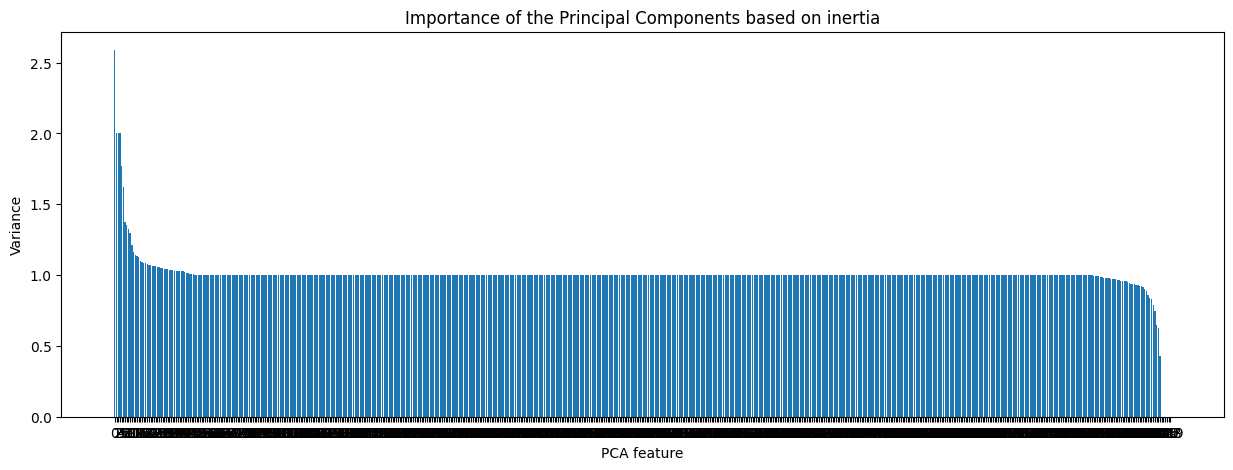

In [18]:
# Standardize/scale the dataset and apply PCA
# Extract the names of the numerical columns
scaler = StandardScaler()
pca = PCA()
pipeline = make_pipeline(scaler,pca)
pipeline.fit(X)
# Plot the principal components against their inertia
features = range(pca.n_components_)
_ = plt.figure(figsize=(15, 5))
_ = plt.bar(features, pca.explained_variance_)
_ = plt.xlabel('PCA feature')
_ = plt.ylabel('Variance')
_ = plt.xticks(features)
_ = plt.title("Importance of the Principal Components based on inertia")
plt.show()

In [19]:
# Applying dimensionality reduction technique (PCA) to reduce columns
pca = PCA(n_components=0.85)
X = pca.fit_transform(X)
# Shape of data frame after applying PCA
print(X.shape)
print("Total number of components after applying PCA",len(pca.components_))

(258897, 9)
Total number of components after applying PCA 9


# Splitting Test and Train Data

In [20]:
# Spliting the dataset into train, test and validation dataset
from sklearn.model_selection import train_test_split
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.7,random_state=20)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5,random_state=20)

# Hyperparamenter tuning for random forest


In [21]:
# Finding the best hyperparameter for random forest regressor using randomized Search CV
n_estimators = [5,20,50,100] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {
                'n_estimators': n_estimators,'max_features': max_features,
               'max_depth': max_depth,'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap
              }

In [22]:
# Importing Random Forest Classifier from the sklearn.ensemble
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

In [23]:
from sklearn.model_selection import RandomizedSearchCV
hyper_tuning_rf = RandomizedSearchCV(estimator = rf_classifier,param_distributions = random_grid,
               n_iter = 100, cv = 2, verbose=2, random_state=35, n_jobs = -1)

In [24]:
# Fitting the parameter into tunning model
hyper_tuning_rf.fit(X_train[:6000,:], y_train[:6000])

Fitting 2 folds for each of 100 candidates, totalling 200 fits


RandomizedSearchCV(cv=2, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      120],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [5, 20, 50, 100]},
                   random_state=35, verbose=2)

In [25]:
print ('Random grid: ', hyper_tuning_rf, '\n')
# print the best parameters
print ('Best Parameters: ', hyper_tuning_rf.best_params_, ' \n')

Random grid:  RandomizedSearchCV(cv=2, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      120],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [5, 20, 50, 100]},
                   random_state=35, verbose=2) 

Best Parameters:  {'n_estimators': 20, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': True}  



# Hyperparamenter tuning for Xgboost


In [26]:
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [27]:
# Finding the best hyperparameter for Xgboost regressor using Gride Search CV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
def hyperParameterTuning(X_train, y_train):
    param_tuning = {

                'learning_rate': [0.01, 0.1],
                'max_depth': [3, 5, 7, 10],
                'min_child_weight': [1, 3, 5],
                'subsample': [0.5, 0.7],
                'colsample_bytree': [0.5, 0.7],
                'n_estimators' : [100, 200, 500],
                'objective': ['reg:squarederror']
        }

    xgb_model = XGBClassifier()

    hyper_tuning_xgb = GridSearchCV(estimator = xgb_model,
                           param_grid = param_tuning,
                           scoring = 'accuracy',
                           cv = 2,
                           n_jobs = -1,
                           verbose = 1)

    hyper_tuning_xgb.fit(X_train,y_train)

    return hyper_tuning_xgb.best_params_


In [28]:
from sklearn.model_selection import GridSearchCV
hyperParameterTuning(X_train[:6000,:], y_train[:6000])

Fitting 2 folds for each of 288 candidates, totalling 576 fits


{'colsample_bytree': 0.5,
 'learning_rate': 0.01,
 'max_depth': 3,
 'min_child_weight': 1,
 'n_estimators': 100,
 'objective': 'reg:squarederror',
 'subsample': 0.5}

# Finding best model in the classification models

In [29]:
# Applying the classification regressors to find any model perform better than normal regressors
cls_estimators = {
    "xgb":XGBClassifier(n_estimators=100,max_depth=3,objective="reg:squarederror",
                       learning_rate=0.01,min_child_weight=1,subsample=0.5, reg_lambda=3
                       ),
    "RFR": RandomForestClassifier(n_estimators= 20, min_samples_split=10,
                                 min_samples_leaf= 4,max_features= 'sqrt', max_depth=10,
                                 bootstrap=True),
    "Dtr": DecisionTreeClassifier( max_depth= None, max_features = 'auto', max_leaf_nodes = None,
                                 splitter = 'best'),
    }

In [30]:
from sklearn.model_selection import cross_validate, cross_val_predict

In [31]:
# Finding accuracy for all model by applying cross validation
cv_results_cls_reg = {}
for nm, est in cls_estimators .items():
  print(nm)
  cv_results_cls_reg[nm] = cross_validate(est, X_train, y_train,scoring='accuracy', return_estimator=True,return_train_score=True, cv=5,verbose=2)

xgb
[CV] END .................................................... total time=   7.1s
[CV] END .................................................... total time=  10.8s
[CV] END .................................................... total time=   6.4s
[CV] END .................................................... total time=  10.4s
[CV] END .................................................... total time=  10.8s
RFR
[CV] END .................................................... total time=   1.8s
[CV] END .................................................... total time=   1.9s
[CV] END .................................................... total time=   1.9s
[CV] END .................................................... total time=   2.7s
[CV] END .................................................... total time=   3.2s
Dtr
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .......

In [32]:
print(cv_results_cls_reg)

{'xgb': {'fit_time': array([ 6.91605592, 10.61563683,  6.30350637, 10.23177767, 10.61897326]), 'score_time': array([0.13904691, 0.14012718, 0.14119005, 0.14343381, 0.14343643]), 'estimator': [XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...), XGBClassifier(base_score=None, booster=None, ca

In [34]:
# Getting mean of all train scores in cross validation
{nm: np.mean(scr["train_score"]) for nm, scr in cv_results_cls_reg.items()}

{'xgb': 0.6881535312031579,
 'RFR': 0.6913056553062633,
 'Dtr': 0.6937114778325444}

In [35]:
 # Getting mean of all test scores in cross validation
{nm: np.mean(scr["test_score"]) for nm, scr in cv_results_cls_reg.items()}

{'xgb': 0.688153531149749,
 'RFR': 0.6903772633148051,
 'Dtr': 0.6892902235240868}

**Among the three models, Xgboost, Random Forest, Decision tree regressors;**

**Random Forest regressor is performing well with accuracy score of 0.69.**

**Let's check with some other models accuracy too**

# Hyperparameter Tuning for KNN

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier


# Define the KNN classifier
knn_classifier = KNeighborsClassifier()

# Define the hyperparameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # You can extend this list based on your requirements
    'weights': ['uniform', 'distance'],  # Different weighting schemes
    'p': [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance
}

# Create GridSearchCV
grid_search = GridSearchCV(estimator=knn_classifier, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train[:6000,:], y_train[:6000])

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)

# Get the best model
best_knn_model = grid_search.best_estimator_
print(best_knn_model)

Best Parameters: {'n_neighbors': 9, 'p': 2, 'weights': 'uniform'}
KNeighborsClassifier(n_neighbors=9)


In [37]:
knn_moel_classifier = KNeighborsClassifier(n_neighbors=9,p=2,weights='uniform')

In [38]:
knn_cv_model_results = cross_validate(knn_moel_classifier, X_train[:6000,:], y_train[:6000],scoring='accuracy', return_estimator=True,return_train_score=True, cv=5,verbose=2)

[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s


In [39]:
knn_cv_model_results.items()

dict_items([('fit_time', array([0.00796318, 0.00622916, 0.00617743, 0.00608039, 0.00632858])), ('score_time', array([0.0797987 , 0.15538335, 0.0939796 , 0.08132339, 0.08362985])), ('estimator', [KNeighborsClassifier(n_neighbors=9), KNeighborsClassifier(n_neighbors=9), KNeighborsClassifier(n_neighbors=9), KNeighborsClassifier(n_neighbors=9), KNeighborsClassifier(n_neighbors=9)]), ('test_score', array([0.53083333, 0.68      , 0.685     , 0.68166667, 0.66833333])), ('train_score', array([0.53833333, 0.69125   , 0.69145833, 0.68104167, 0.68229167]))])

In [40]:
np.mean(knn_cv_model_results["train_score"])

0.656875

In [41]:
np.mean(knn_cv_model_results["test_score"])

0.6491666666666667

**The accuracy score for KNN Model for,**

**Test score is 0.64**
**Train score is 0.65**

#Hyperparamenter Tuning for SVM

In [42]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
model=SVC()
param_grid={'C': np.logspace(-3,3, num=200, base=10), 'kernel':['rbf','linear', 'poly','sigmoid']}
rdm_search= RandomizedSearchCV(model, param_grid, scoring='accuracy', n_jobs=-1, cv=5, random_state=1)

In [43]:
rdm_search.fit(X_train[:6000,:], y_train[:6000])

RandomizedSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
                   param_distributions={'C': array([1.00000000e-03, 1.07189132e-03, 1.14895100e-03, 1.23155060e-03,
       1.32008840e-03, 1.41499130e-03, 1.51671689e-03, 1.62575567e-03,
       1.74263339e-03, 1.86791360e-03, 2.00220037e-03, 2.14614120e-03,
       2.30043012e-03, 2.46581108e-03, 2.64308149e-03, 2.83309610e-03,
       3.03677112e-03, 3.25508860e-0...
       2.67384162e+02, 2.86606762e+02, 3.07211300e+02, 3.29297126e+02,
       3.52970730e+02, 3.78346262e+02, 4.05546074e+02, 4.34701316e+02,
       4.65952567e+02, 4.99450512e+02, 5.35356668e+02, 5.73844165e+02,
       6.15098579e+02, 6.59318827e+02, 7.06718127e+02, 7.57525026e+02,
       8.11984499e+02, 8.70359136e+02, 9.32930403e+02, 1.00000000e+03]),
                                        'kernel': ['rbf', 'linear', 'poly',
                                                   'sigmoid']},
                   random_state=1, scoring='accuracy')

In [44]:
rdm_search.best_estimator_

SVC(C=573.8441648302393)

In [45]:
rdm_search.best_score_

0.691

In [46]:
model_svc=SVC(kernel='poly', C=573.8441 )

In [47]:
svc_model_cv_result = cross_validate(model_svc, X_train[:6000,:], y_train[:6000],scoring='accuracy', return_estimator=True,return_train_score=True, cv=5,verbose=2)

[CV] END .................................................... total time=   3.6s
[CV] END .................................................... total time=   3.5s
[CV] END .................................................... total time=   4.3s
[CV] END .................................................... total time=   3.5s
[CV] END .................................................... total time=   2.5s


In [48]:
svc_model_cv_result.items()

dict_items([('fit_time', array([3.5183084 , 3.3938992 , 4.07963777, 3.33837986, 2.35335517])), ('score_time', array([0.11559653, 0.11272645, 0.19381142, 0.13594794, 0.10862207])), ('estimator', [SVC(C=573.8441, kernel='poly'), SVC(C=573.8441, kernel='poly'), SVC(C=573.8441, kernel='poly'), SVC(C=573.8441, kernel='poly'), SVC(C=573.8441, kernel='poly')]), ('test_score', array([0.6825    , 0.69166667, 0.67833333, 0.68333333, 0.68166667])), ('train_score', array([0.6875    , 0.69520833, 0.68916667, 0.68854167, 0.68854167]))])

In [49]:
np.mean(svc_model_cv_result["train_score"])

0.6897916666666667

In [50]:
np.mean(svc_model_cv_result["test_score"])

0.6834999999999999

**The accuracy score for SVM Model for,**

**Test score is 0.683 Train score is 0.689**

# Voting ensemble model

In [59]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_validate
from sklearn.svm import SVC
import numpy as np

# Define individual classifiers
svc_model1 = SVC(kernel='rbf', C=1.0)
svc_model2 = SVC(kernel='linear', C=1.0)
svc_model3 = SVC(kernel='poly', C=1.0)

# Create a VotingClassifier
voting_classifier = VotingClassifier(estimators=[
    ('rbf', svc_model1),
    ('linear', svc_model2),
    ('poly', svc_model3)
], voting='hard')

# Train the VotingClassifier using cross-validation
voting_model_cv_result = cross_validate(voting_classifier, X_train[:6000, :], y_train[:6000],
                                       scoring='accuracy', return_estimator=True,
                                       return_train_score=True, cv=5, verbose=2)



[CV] END .................................................... total time=   3.5s
[CV] END .................................................... total time=   2.2s
[CV] END .................................................... total time=   2.2s
[CV] END .................................................... total time=   3.7s
[CV] END .................................................... total time=   2.8s


In [60]:
# Mean training accuracy
np.mean(voting_model_cv_result["train_score"])


0.6859166666666667

In [61]:

# Mean testing accuracy
np.mean(voting_model_cv_result["test_score"])

0.6831666666666667

**The accuracy score for Voting Ensemble Model for,**

**Test score is 0.683**
**Train score is 0.685**

# Stacking Classifier

In [66]:
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB


# Define individual base classifiers
log_reg_model = LogisticRegression()
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
nb_model = GaussianNB()

# Define the meta-classifier
meta_classifier = LogisticRegression()

# Create a StackingClassifier
stacking_classifier = StackingClassifier(
    estimators=[('log_reg', log_reg_model), ('gb', gb_model), ('nb', nb_model)],
    final_estimator=meta_classifier,
    stack_method='auto',  # You can also use 'predict_proba' or 'decision_function'
    cv=5  # Number of cross-validation folds for training the meta-classifier
)

# Train the StackingClassifier using cross-validation
stacking_model_cv_result = cross_validate(stacking_classifier, X_train[:6000, :], y_train[:6000],
                                          scoring='accuracy', return_estimator=True,
                                          return_train_score=True, cv=5, verbose=2)



[CV] END .................................................... total time=  19.8s
[CV] END .................................................... total time=  22.9s
[CV] END .................................................... total time=  19.7s
[CV] END .................................................... total time=  19.9s
[CV] END .................................................... total time=  17.7s


In [67]:
# Mean training accuracy
np.mean(stacking_model_cv_result["train_score"])

0.6961666666666666

In [68]:
# Mean testing accuracy
np.mean(stacking_model_cv_result["test_score"])

0.6930000000000001

**The accuracy score for Stacking Classifier Model for,**

**Test score is 0.693**
**Train score is 0.696**

# Among all the models, Random Forest Regressor is performing well with accuracy scores as:

**Test Data Accuracy Score:** 0.690

**Train Data Accuracy Score:** 0.691
